### Data Visualisasi

In [1]:
#matplotlib
#seaborn
#bokeh
#plotly

Jenis Chart
- Histogram
- Bar
- Boxplot
- Scatter Plot
- Line plot
- Pie chart
- Heatmap
- Countplot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

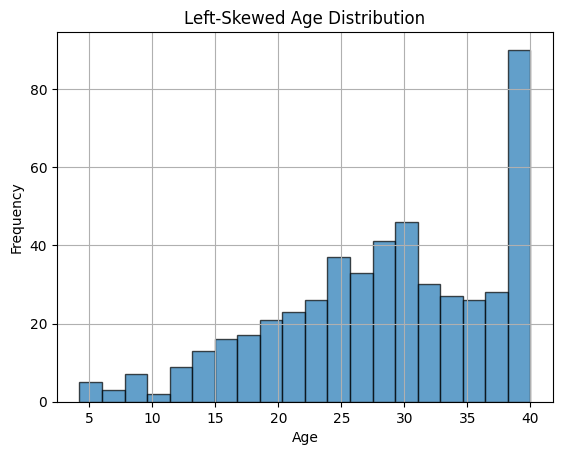

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of data points
num_points = 500

# Generate left-skewed age values
age_mean = 50
age_std = 10
age_max = 80

# Generate age values with a left-skewed distribution
age_values = np.random.normal(age_mean, age_std, num_points)
age_values = np.clip(age_values, age_mean - age_std, age_max)  # Clip values to be within the desired range
age_values = age_max - age_values  # Reverse the values to create a left-skewed distribution

# Plot the histogram to visualize the distribution
plt.hist(age_values, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Left-Skewed Age Distribution')
plt.grid(True)
plt.show()


In [37]:
np.random.seed(42)
num_samples = 500

data = {
    'Age': np.random.randint(18, 80, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Income': np.random.randint(1000000, 15000000, num_samples),
    'Education': np.random.choice(['SD', 'SMP', 'SMA', 'S1', 'S2', 'S3'], num_samples),
}
df = pd.DataFrame(data)

#### Histogram

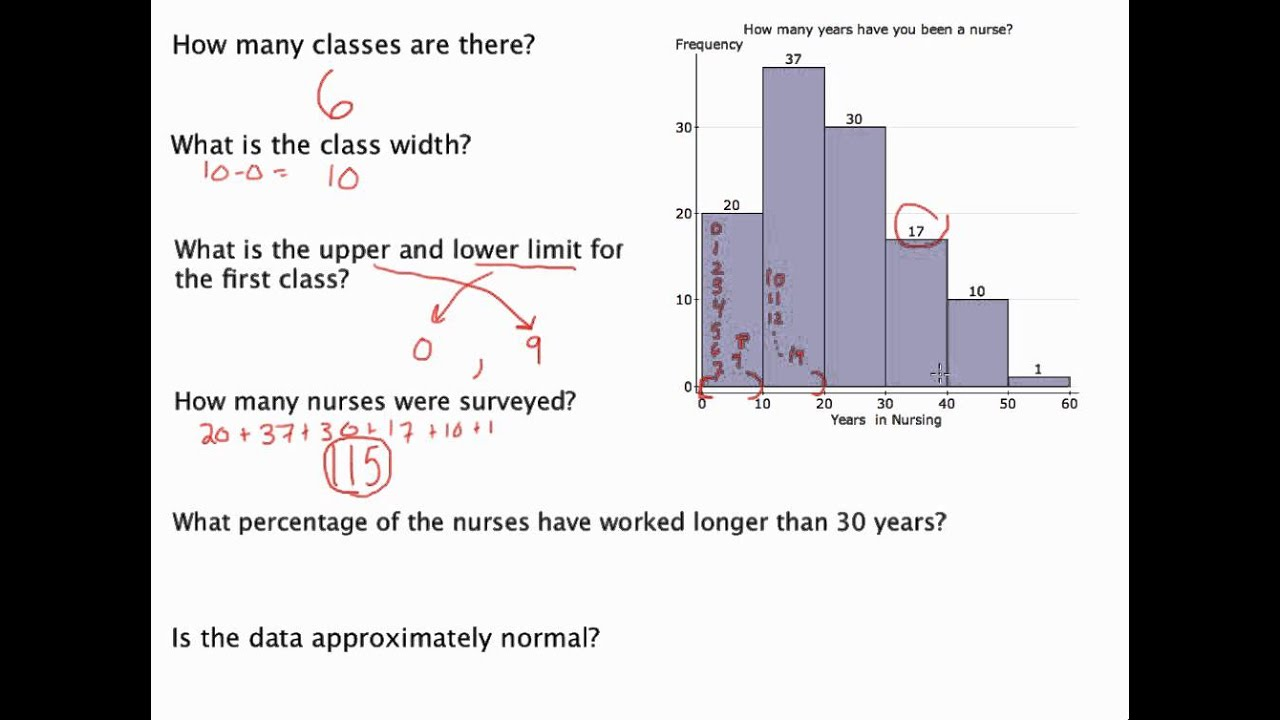

In [38]:
def show_histogram(data, kolom, figsize=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=figsize) #(horizontal, vertical)
    sns.histplot(df, x=kolom)
    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)

Text(0, 0.5, 'Frekuensi')

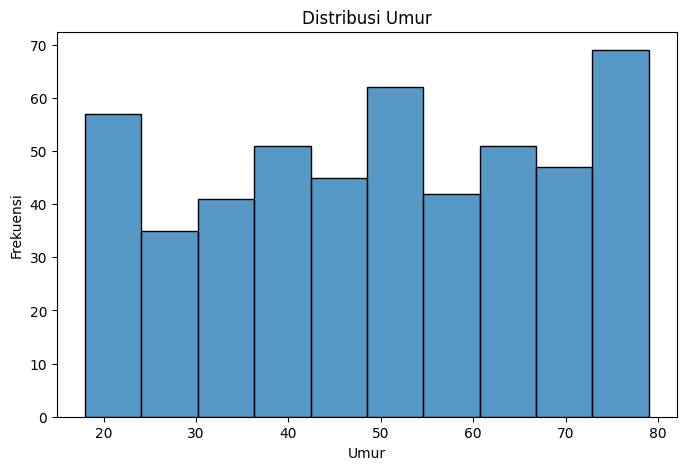

In [39]:
plt.figure(figsize=(8, 5)) #(horizontal, vertical)
sns.histplot(df, x='Age')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')

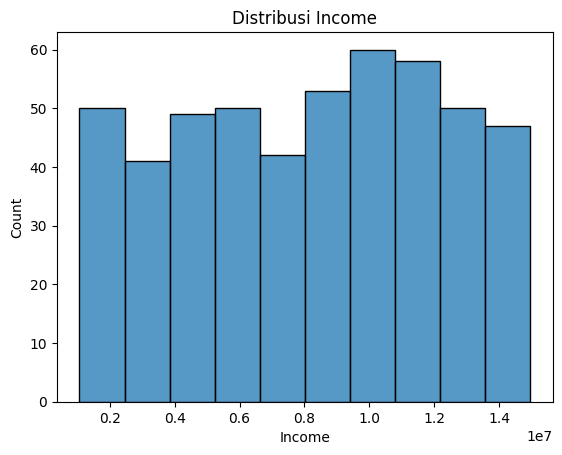

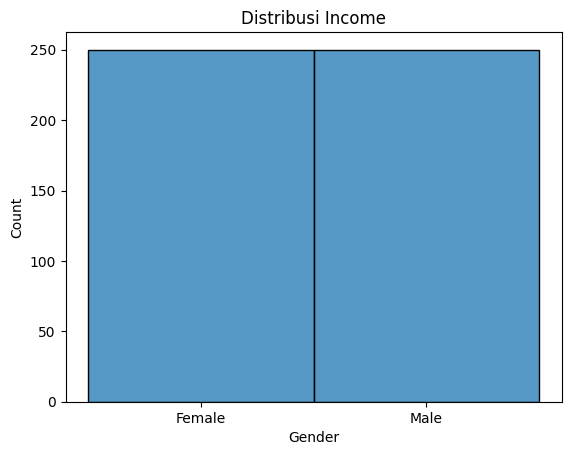

In [40]:
show_histogram(df, 'Income', title='Distribusi Income')
show_histogram(df, 'Gender', title='Distribusi Income')

#### Apakah ada kecenderungan perbedaan pendapatan antar gender

<Axes: xlabel='Income', ylabel='Count'>

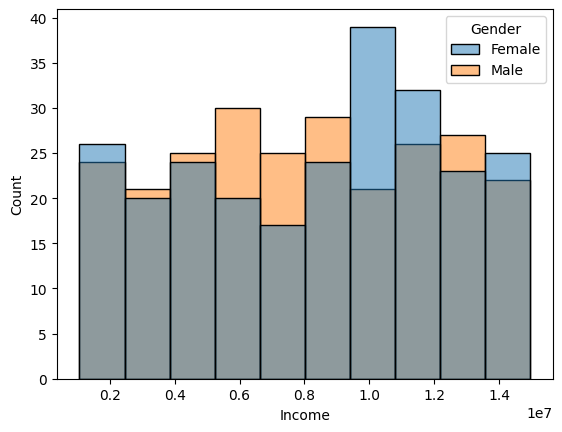

In [41]:
sns.histplot(df, x='Income', hue='Gender')

<Axes: xlabel='Income', ylabel='Density'>

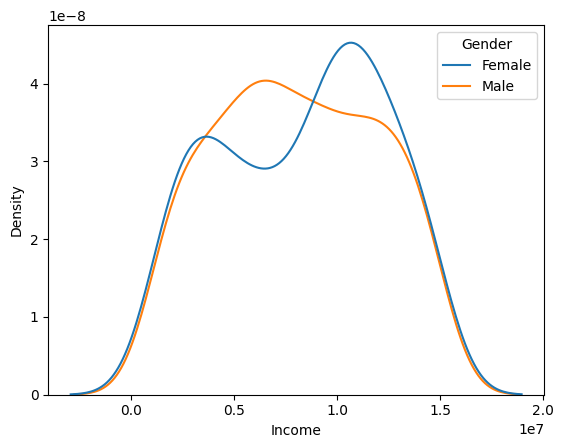

In [42]:
sns.kdeplot(df, x='Income', hue='Gender')

In [43]:
df.groupby('Gender')['Income'].mean()

Gender
Female    8306735.056
Male      8057189.600
Name: Income, dtype: float64

In [44]:
df.groupby('Gender')['Income'].median()

Gender
Female    8983155.0
Male      8011972.0
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Density'>

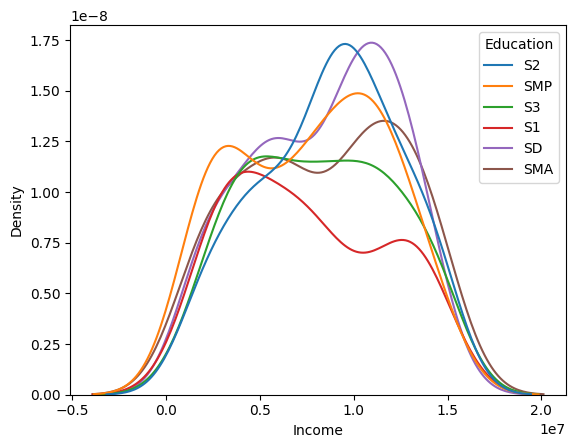

In [45]:
sns.kdeplot(df, x='Income', hue='Education')

In [48]:
df.groupby('Education')['Income'].median().sort_values(ascending=False)

Education
SD     9376430.0
S2     9034120.0
SMA    8643603.0
SMP    8264180.0
S3     8235574.0
S1     6914988.0
Name: Income, dtype: float64

In [49]:
#coba cara lain untuk plot histogram

#### Bar Plot

<Axes: xlabel='Gender', ylabel='count'>

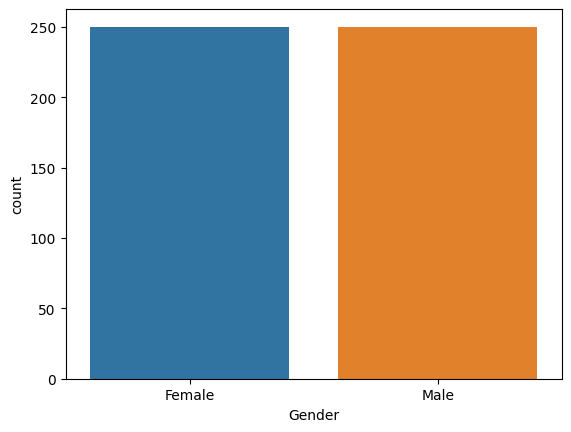

In [50]:
sns.countplot(df, x='Gender')

<Axes: xlabel='Education', ylabel='count'>

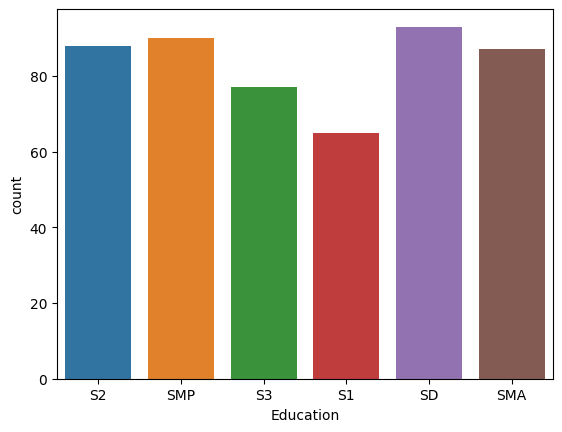

In [51]:
sns.countplot(df, x='Education')

In [55]:
#cari cara lain untuk memplotkan bar

<BarContainer object of 3 artists>

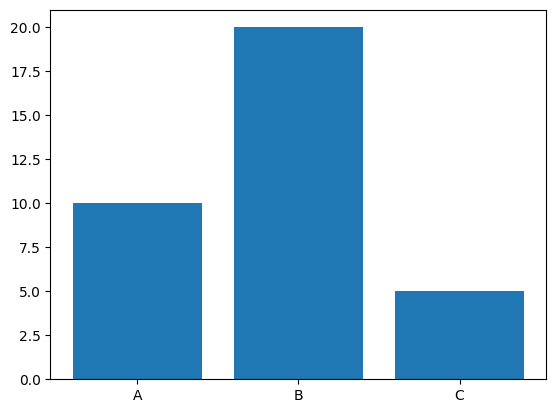

In [57]:
plt.bar(['A', 'B', 'C'], [10, 20, 5])

### Boxplot

<Axes: xlabel='Age'>

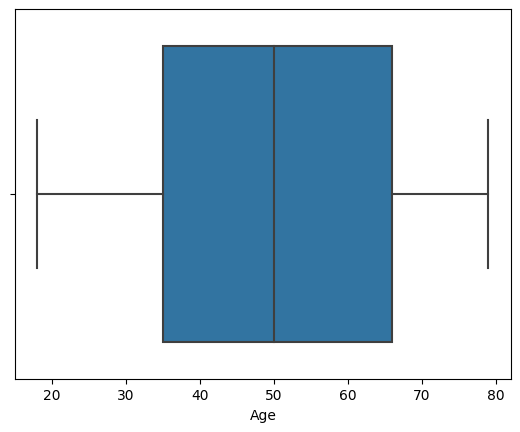

In [59]:
sns.boxplot(df, x='Age')

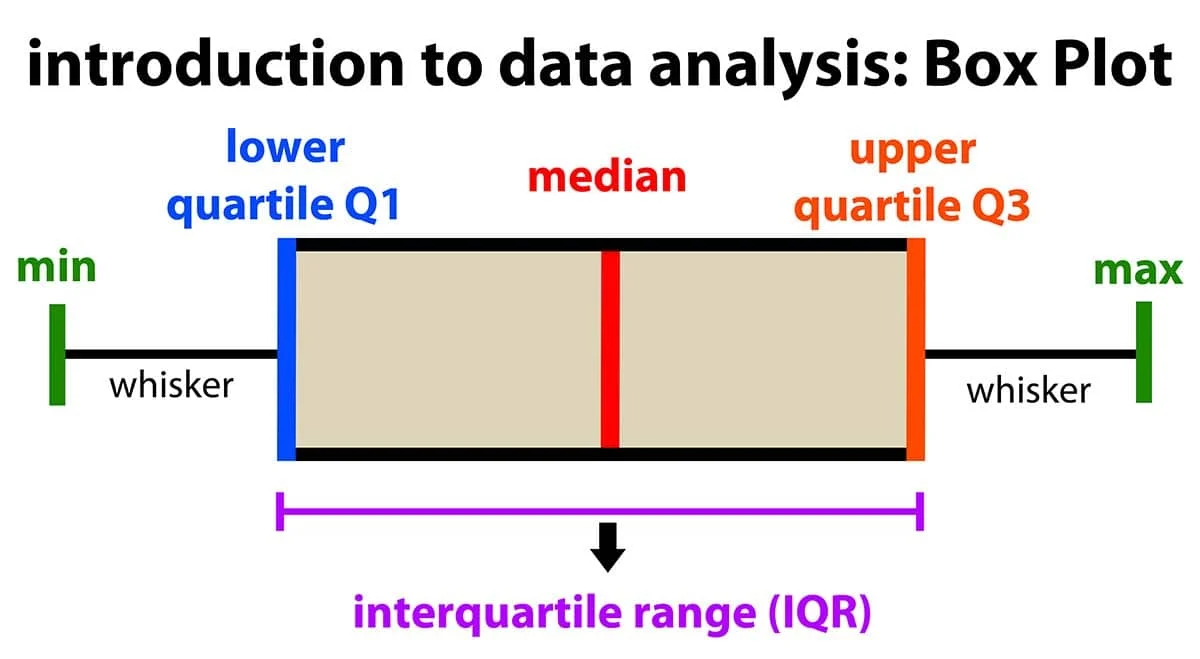

In [67]:
df['Age'].describe()

count    500.000000
mean      49.910000
std       18.221909
min       18.000000
25%       35.000000
50%       50.000000
75%       66.000000
max       79.000000
Name: Age, dtype: float64

In [61]:
# Q1 = percentile 25
# Q2 = percentile 50 = median
# Q3 = percentile 75

<Axes: >

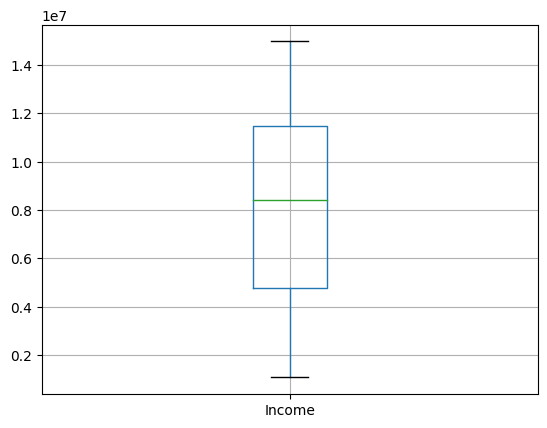

In [64]:
df.boxplot('Income')

<Axes: ylabel='Income'>

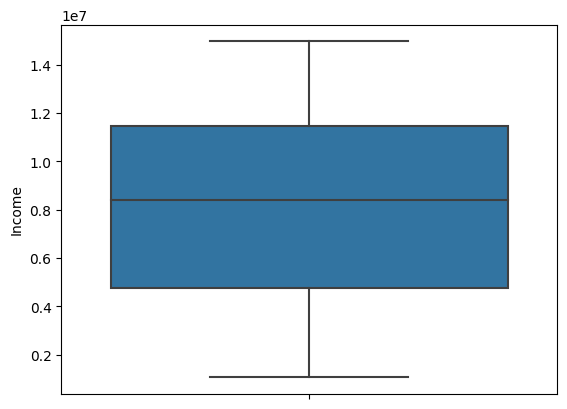

In [66]:
sns.boxplot(df, y='Income')

### Scatter Plot

In [70]:
sns.scatterplot

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

In [72]:
df[['Age','Income']].head()

,Age,Income
0,56,2178049
1,69,4080201
2,46,14060919
3,32,8136029
4,60,12951345


<Axes: xlabel='Age', ylabel='Income'>

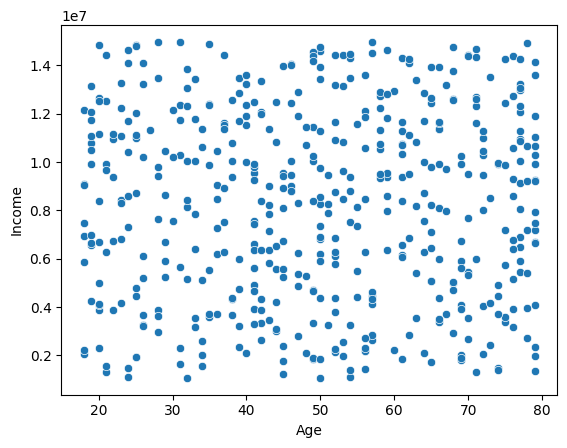

In [71]:
sns.scatterplot(df, x='Age', y='Income')

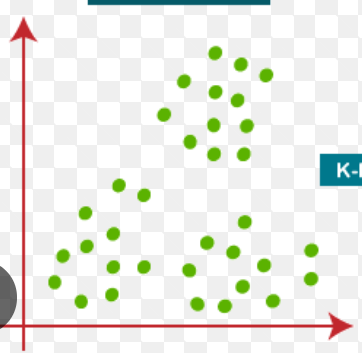

x = pengeluaran
y = pendapatan

### Line Plot

In [74]:
# Set the number of months and years
num_years = 3
months_per_year = 12
total_months = num_years * months_per_year

# Generate time periods (months)
months = pd.date_range(start='2021-01-01', periods=total_months, freq='M')

# Generate a trend
trend = np.linspace(1000, 1500, total_months) + np.random.randn(total_months) * 100

# Generate seasonality
monthly_seasonality = np.array([np.sin(2 * np.pi * i / months_per_year) for i in range(total_months)])
seasonal_factor = 100 * (0.5 * monthly_seasonality + 1)

# Combine trend and seasonality
sales = trend + seasonal_factor

# Add random noise
np.random.seed(0)
noise = np.random.normal(0, 50, total_months)
sales += noise

# Create a DataFrame
sales_data = pd.DataFrame({'Date': months, 'Sales': sales})

<Axes: xlabel='Date'>

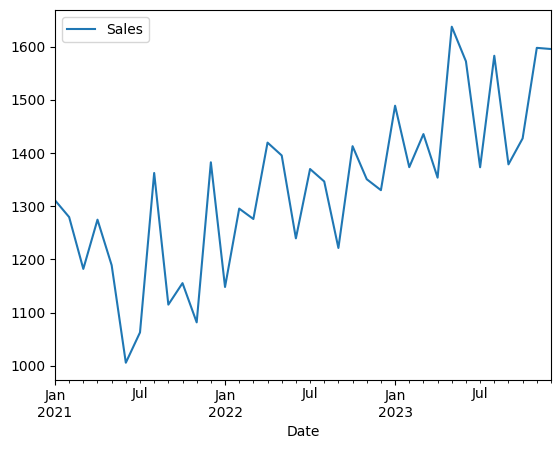

In [77]:
sales_data.set_index('Date').plot()

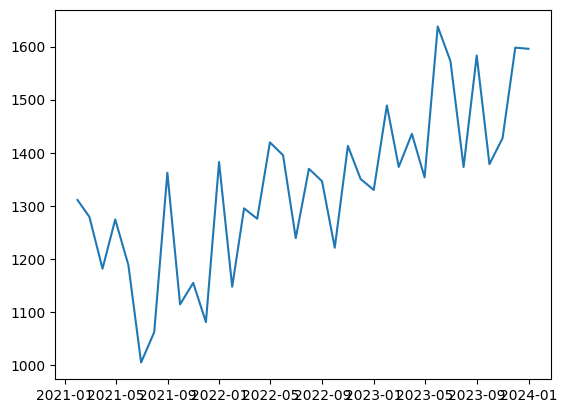

In [85]:
plt.plot(sales_data['Date'], sales_data['Sales'])

### Pie Chart

In [88]:
edu_counts = df['Education'].value_counts()

([<matplotlib.patches.Wedge at 0x1734c679750>,
 [Text(-1.0928855094771739, 0.12490501661189815, 'SD'),
  Text(-0.5606063757458277, -0.9464251113918777, 'SMP'),
  Text(0.6061698475523114, -0.9179096447463703, 'S2'),
  Text(1.0930588364120772, 0.12337901013331297, 'SMA'),
  Text(0.4565119065609732, 1.0007981210853993, 'S3'),
  Text(-0.49253501135679667, 0.9835696531449922, 'S1')],
 [Text(-0.5961193688057311, 0.06813000906103535, '18.6%'),
  Text(-0.30578529586136055, -0.5162318789410241, '18.0%'),
  Text(0.33063809866489713, -0.5006779880434746, '17.6%'),
  Text(0.5962139107702239, 0.06729764189089797, '17.4%'),
  Text(0.24900649448780351, 0.5458898842283996, '15.4%'),
  Text(-0.26865546074007085, 0.5364925380790866, '13.0%')])

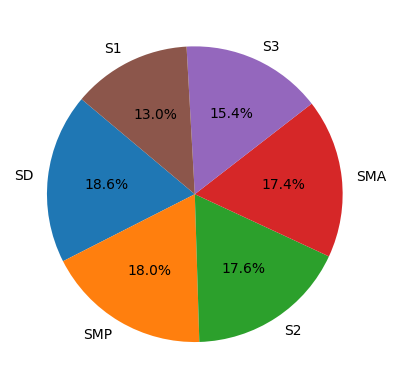

In [90]:
plt.pie(edu_counts.values, labels=edu_counts.keys(), autopct='%1.1f%%', startangle=140)

bad pie chart
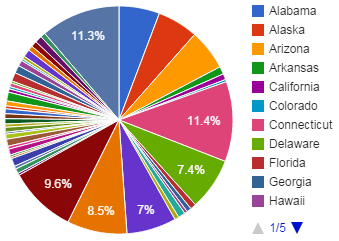

## Excercise

Ambil insight sebanyak mungkin dari data yang diberikan dan buat presentasinya. 

In [91]:
df = pd.read_csv('retail_raw_reduced_data_quality.csv')

In [92]:
df

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


<Axes: xlabel='item_price', ylabel='quantity'>

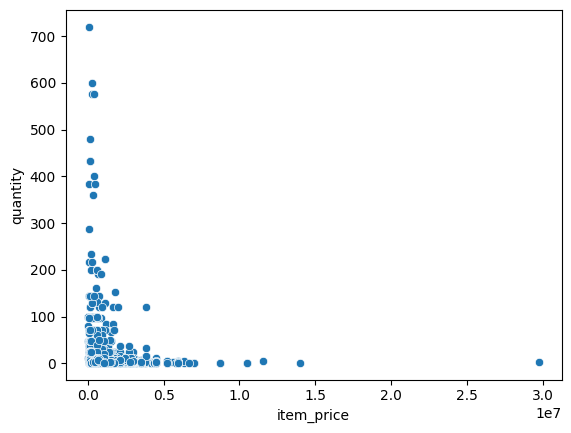

In [94]:
sns.scatterplot(df, y='quantity', x='item_price')

In [ ]:
1. top 5 brand terlaris (barchart yang diurutkan dari bar tertinggi ke terendah)
2. top 5 product_id termahal
3. hari apa aja yang paling rame pembeliannya

In [ ]:
script 1 